In [1]:
import models
import ciw
import matplotlib.pyplot as plt

In [2]:
def compare_theory_and_simulation(l, mu, R, limit, max_time, obs_period):
    # Get theoretical
    M = models.MMRPS_aggregate(l, mu, R, limit)
    M.get_probs()
    
    # Define simulation & solve
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(l)],
        service_distributions=[ciw.dists.Exponential(mu)],
        number_of_servers=[float('inf')],
        ps_thresholds=[R]
    )
    ciw.seed(0)
    Q = ciw.Simulation(N, node_class=ciw.PSNode,  tracker=ciw.trackers.SystemPopulation())
    Q.simulate_until_max_time(max_time)
    experimental = Q.statetracker.state_probabilities(observation_period=obs_period)
    
    # Plot and compare
    fig, ax = plt.subplots(1)
    ax.plot(sorted(M.probs.keys()), [M.probs[k] for k in sorted(M.probs.keys())], label='Theoretical')
    ax.scatter(sorted(M.probs.keys()), [M.probs[k] for k in sorted(M.probs.keys())])
    ax.plot(sorted(experimental.keys()), [experimental[k] for k in sorted(experimental.keys())], label='Simulation')
    ax.scatter(sorted(experimental.keys()), [experimental[k] for k in sorted(experimental.keys())])
    ax.set_xlim(0, max(experimental.keys()))
    ax.legend(fontsize=14)
    ax.set_xlabel('Number of Customers', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.set_title(f"$\lambda = {l}, \mu= {mu}$", fontsize=16)
    return fig

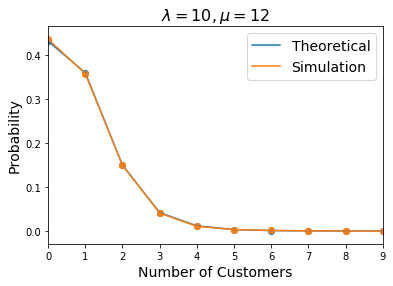

In [3]:
compare_theory_and_simulation(l=10, mu=12, R=3, limit=50, max_time=2000, obs_period=(200, 1800));

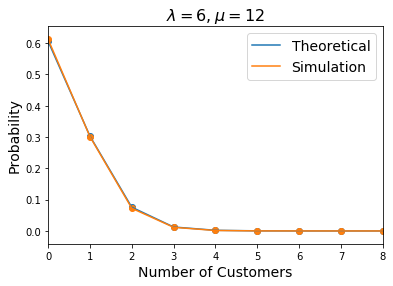

In [4]:
compare_theory_and_simulation(l=6, mu=12, R=3, limit=50, max_time=2000, obs_period=(200, 1800));

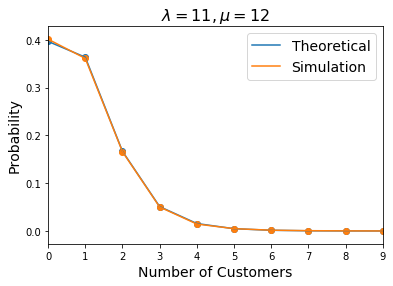

In [5]:
compare_theory_and_simulation(l=11, mu=12, R=3, limit=50, max_time=2000, obs_period=(200, 1800));

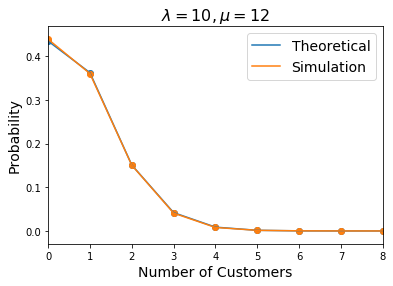

In [6]:
compare_theory_and_simulation(l=10, mu=12, R=5, limit=50, max_time=2000, obs_period=(200, 1800));

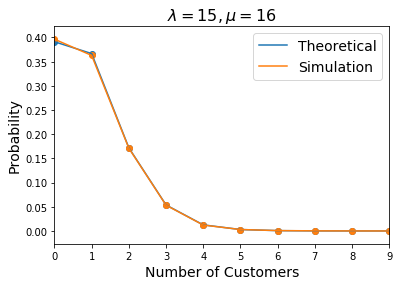

In [7]:
compare_theory_and_simulation(l=15, mu=16, R=4, limit=50, max_time=2000, obs_period=(200, 1800));

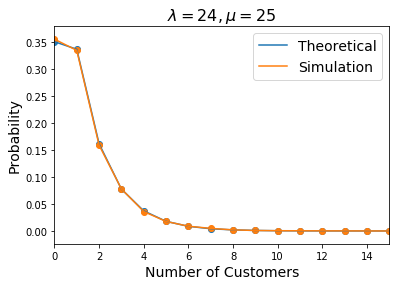

In [8]:
compare_theory_and_simulation(l=24, mu=25, R=2, limit=50, max_time=2000, obs_period=(200, 1800));